In [1]:
# Import necessary libraries
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as mp
from sklearn.preprocessing import binarize
from scipy.stats import skew
from scipy.stats import boxcox

# Do not show warnings
import warnings
warnings.filterwarnings("ignore")

#Read the wrangled csv file
df=pd.read_csv('df_wrangled.csv',low_memory=False)

In [2]:
#Create list of all numerical features
numerical_list = df.dtypes[df.dtypes=='float64'].index

# Create a dataframe with columns of numerical_list
df1 = df.loc[:,numerical_list]

# Fill null values with median
df1 = df1.apply(lambda x:x.fillna(x.median()),axis=0)

# Update df with columns of df1
df.update(df1)

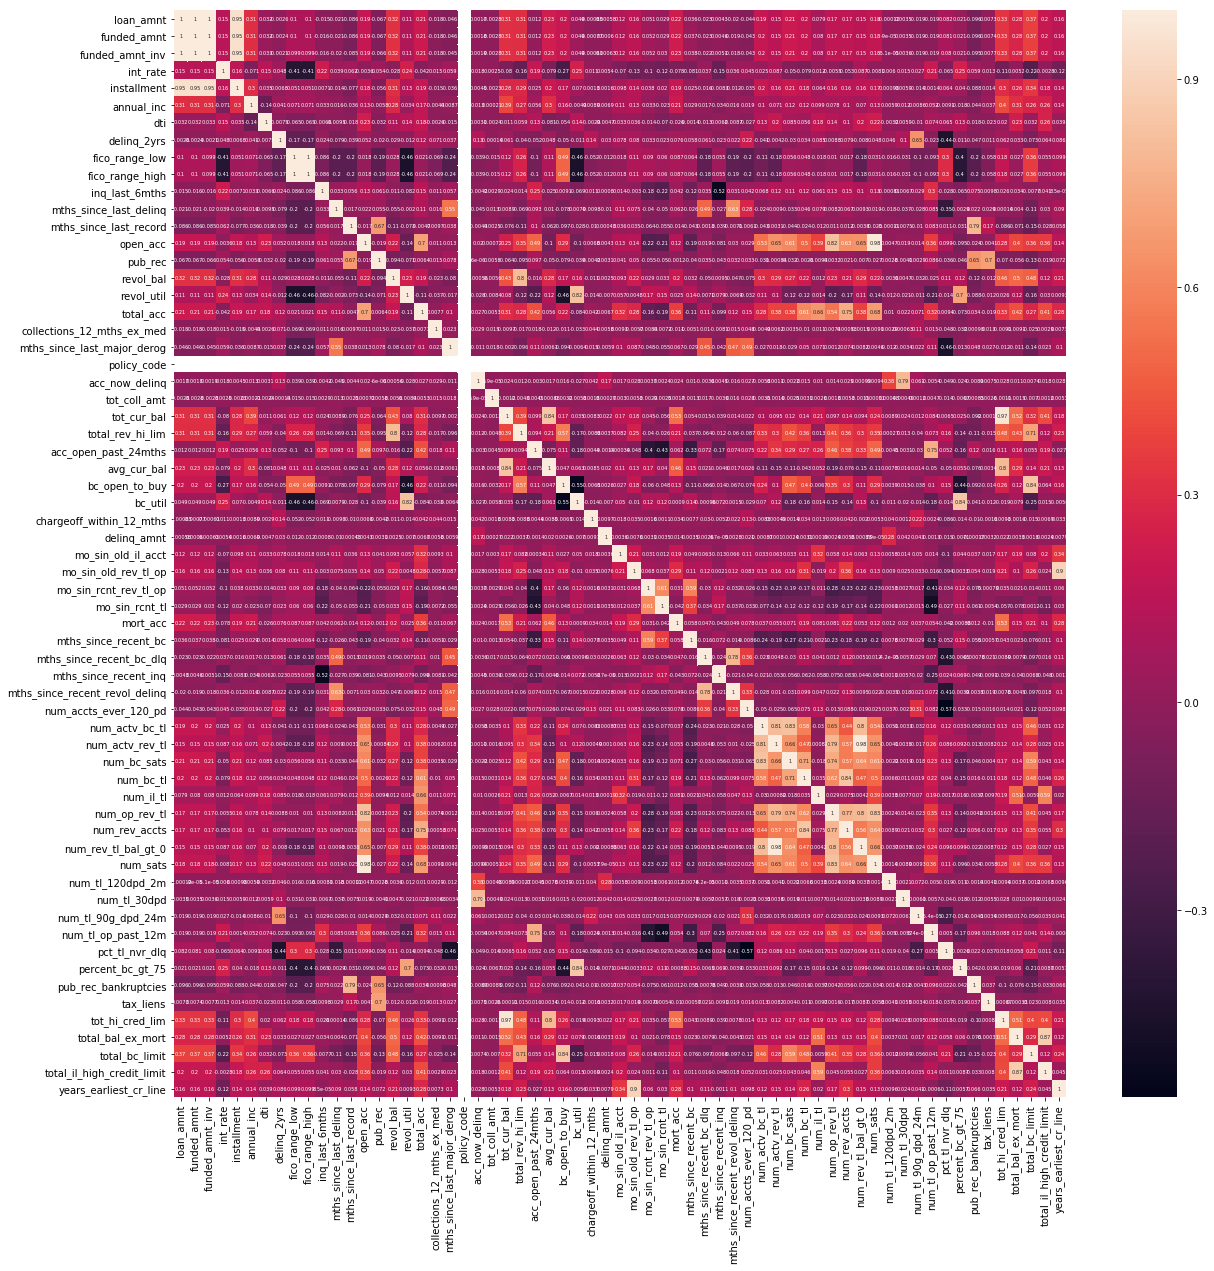

In [3]:
# Plot the correlation heatmap to find highly correlated numerical features
plt.figure(figsize=(20,20))
corr=df.drop('charged_off',axis=1).corr() # Drop response variable column
sns.heatmap(corr,annot=True,annot_kws={"size": 5})
#Save plot in a separate file
mp.savefig('heatmap.png', bbox_inches='tight')

In [4]:
# Check the row which is totally white.
df.loc[:,'policy_code'].describe()

count    1266618.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: policy_code, dtype: float64

In [5]:
# policy_code is 1 across all row, therefore, it is useless for prediction and must be removed
df.drop('policy_code', axis=1,inplace=True)

In [6]:
# 1) loan amount, funded amount, invested funded amount, and installment are highly correlated. loan_amnt is kept and the 
# rest are removed.
# 2) fico_range_low (lower boundary range of borrower's FICO score) is removed because it is highly correlated to fico_range_high 
# (upper boundary range of borrower's FICO scores).
# 3) num_sats, which is number of satisfactory accounts, is removed because it is highly correlate to open_acc 
# which is the number of open credit lines in the borrower's credit file.
# 4) tot_hi_cred_lim, which is total high credit/credit limit, is removed because it is highly correlated to tot_cur_bal, 
# which is total current balance of all accounts.
# 5) num_rev_tl_bal_gt_0, which is number of revolving trades with balance more than 0, is removed because it is highly 
# correlated to num_actv_rev_tl, which is number of currently active revolving trades
# 6) mo_sin_old_rev_tl_op, which is number of months since oldest revolving account is removed because it is highly
# correlated to years_earliest_cr_line which is number of years since the first credit line 


removal_list = ['funded_amnt','funded_amnt_inv','installment','fico_range_low','num_sats','tot_hi_cred_lim',
                'num_rev_tl_bal_gt_0','mo_sin_old_rev_tl_op']

df.drop(removal_list,axis=1,inplace=True)

In [7]:
df.describe()

,loan_amnt,int_rate,annual_inc,charged_off,dti,delinq_2yrs,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,years_earliest_cr_line
count,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,...,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06
mean,1.441237e+04,1.326681e+01,7.608045e+04,2.011475e-01,1.823720e+01,3.175504e-01,7.000093e+02,6.626836e-01,1.699999e+01,1.201540e+01,...,8.425429e-02,2.173079e+00,9.437837e+01,4.542289e+01,1.346657e-01,5.185778e-02,4.910055e+04,2.126465e+04,4.143988e+04,1.625771e+01
std,8.682661e+03,4.752450e+00,6.991429e+04,4.008582e-01,1.080488e+01,8.765928e-01,3.173463e+01,9.440453e-01,2.307597e+01,2.871469e+01,...,4.889999e-01,1.794400e+00,8.514614e+00,3.509777e+01,3.782994e-01,3.965001e-01,4.668891e+04,2.105275e+04,4.198775e+04,7.488785e+00
min,5.000000e+02,5.310000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.290000e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,8.000000e+03,9.750000e+00,4.580000e+04,0.000000e+00,1.179000e+01,0.000000e+00,6.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,9.200000e+01,1.430000e+01,0.000000e+00,0.000000e+00,2.152200e+04,8.000000e+03,1.550000e+04,1.125000e+01
50%,1.200000e+04,1.279000e+01,6.500000e+04,0.000000e+00,1.760000e+01,0.000000e+00,6.940000e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+00,9.790000e+01,4.440000e+01,0.000000e+00,0.000000e+00,3.726800e+04,1.500000e+04,3.160000e+04,1.476000e+01
75%,2.000000e+04,1.599000e+01,9.000000e+04,0.000000e+00,2.402000e+01,0.000000e+00,7.140000e+02,1.000000e+00,3.100000e+01,0.000000e+00,...,0.000000e+00,3.000000e+00,1.000000e+02,7.500000e+01,0.000000e+00,0.000000e+00,6.100900e+04,2.720000e+04,5.451300e+04,2.001000e+01
max,4.000000e+04,3.099000e+01,1.099920e+07,1.000000e+00,9.990000e+02,3.900000e+01,8.500000e+02,8.000000e+00,2.260000e+02,1.290000e+02,...,3.900000e+01,3.200000e+01,1.000000e+02,1.000000e+02,1.200000e+01,8.500000e+01,3.408095e+06,1.105500e+06,2.101913e+06,8.331000e+01


#### There are many features with significant number of zeros. Binarizing these features could improve the predicting model if the charged-off ratio is different between zero and non-zero values. The binarized features will be added as new columns after investigating their impact on the response variable. 

In [8]:
#Create list of all numerical features
numerical_list = df.dtypes[df.dtypes=='float64'].index

#  Features with 95th percentile of 0 value in numerical_list are separated 
zero_list = [feature for feature in numerical_list if df.loc[:,feature].quantile(0.95)==0]

# Print number of features for which 95th percentile is 0
len(zero_list)

7

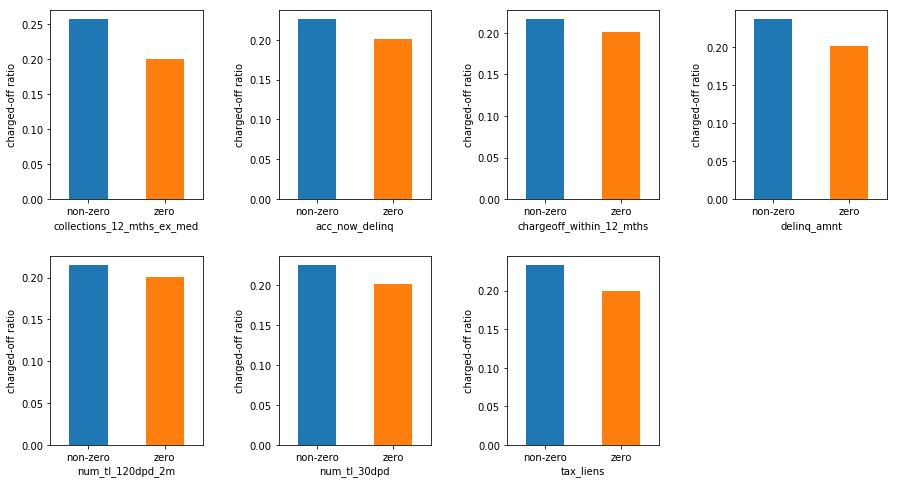

In [16]:
#Divide the values of features in the zero_list to zero and nonzero, and investigate ratio of charged-off loans
# across zero and nonzero values. 

figure, axes = plt.subplots(2,4,figsize=(15,8))
i = 0
new_df = df.loc[:,zero_list+['charged_off']]

for feature in zero_list:
    new_df[feature] = new_df[feature].apply(lambda x: 'zero' if x==0 else 'non-zero')
    ax = axes.reshape(-1)[i]
    (new_df.groupby(feature)['charged_off'].mean()).plot.bar(ax=ax)
    ax.set_xlabel(feature)
    for label in ax.get_xticklabels():
        label.set_rotation(0)
    ax.set_ylabel('charged-off ratio')
    i+=1
plt.subplots_adjust(hspace=0.3,wspace=0.5)
figure.delaxes(axes[1][3])
mp.savefig('countplot.png', bbox_inches='tight')

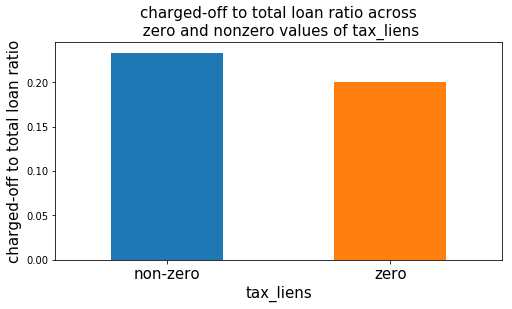

In [15]:
# Plot 'tax_liens' in a separate figure
(new_df.groupby('tax_liens')['charged_off'].mean()).plot.bar(figsize=(8,4))
plt.xlabel('tax_liens',fontsize=15)
plt.xticks(rotation=0,size=15)
plt.ylabel('charged-off to total loan ratio',fontsize=15)
plt.title('charged-off to total loan ratio across\n zero and nonzero values of tax_liens',fontsize=15)
plt.show()

In [17]:
# As it can be seen, the charged-off ratio is different between zero and non-zero values across all features in zero_list.  
# These features are binarized and stored as new features
for feature in zero_list:
    df[feature+'_zero']=df[feature].apply(lambda x: 'True' if x==0 else 'False')

### Outliers

In [6]:
# A value will be capped if it is more than 99th percentile or the outlier threshold by the box plot 
# (which is 75th percentile plus 1.5 interquartile range) whichever is larger.
# A value will be floored if it is less than 1th percentile or the outlier threshold by box plot 
# (which is 25th percentile minus 1.5 interquartile range) whichever is smaller. The outcome will be floored at 0
# because none of the features can have negative values.

def cap_floor(df,feature_list):
    """This function caps and floors outliers in each feature. A value is capped by 99th percentile or 
    the outlier threshold by the box plot (which is 75th percentile plus 1.5 interquartile range) whichever is larger.
    A value is floored if it is less than 1th percentile or the outlier threshold by the box plot 
    (which is 25th percentile minus 1.5 interquartile range) whichever is smaller; the outcome will be floored at 0."""
    
    # Separate numerical features
    for feature in feature_list:
        # Define different quantiles and IQR
        q1 = df[feature].quantile(0.01)
        q25 = df[feature].quantile(0.25)
        q75 = df[feature].quantile(0.75)
        q99 = df[feature].quantile(0.99)
        iqr = q75-q25
        #Floor and cap values
        lower_limit = max(min(q1,q25-1.5*iqr),0)
        upper_limit = max(q99,q75+1.5*iqr)
        df[feature].clip(lower_limit,upper_limit,inplace=True)
    return df

In [19]:
# Create list of features which are not in the zero_list
nonzero_list = [feature for feature in numerical_list if feature not in zero_list]

# Apply cap_floor to df to cap and floor outliers
df = cap_floor(df,nonzero_list)

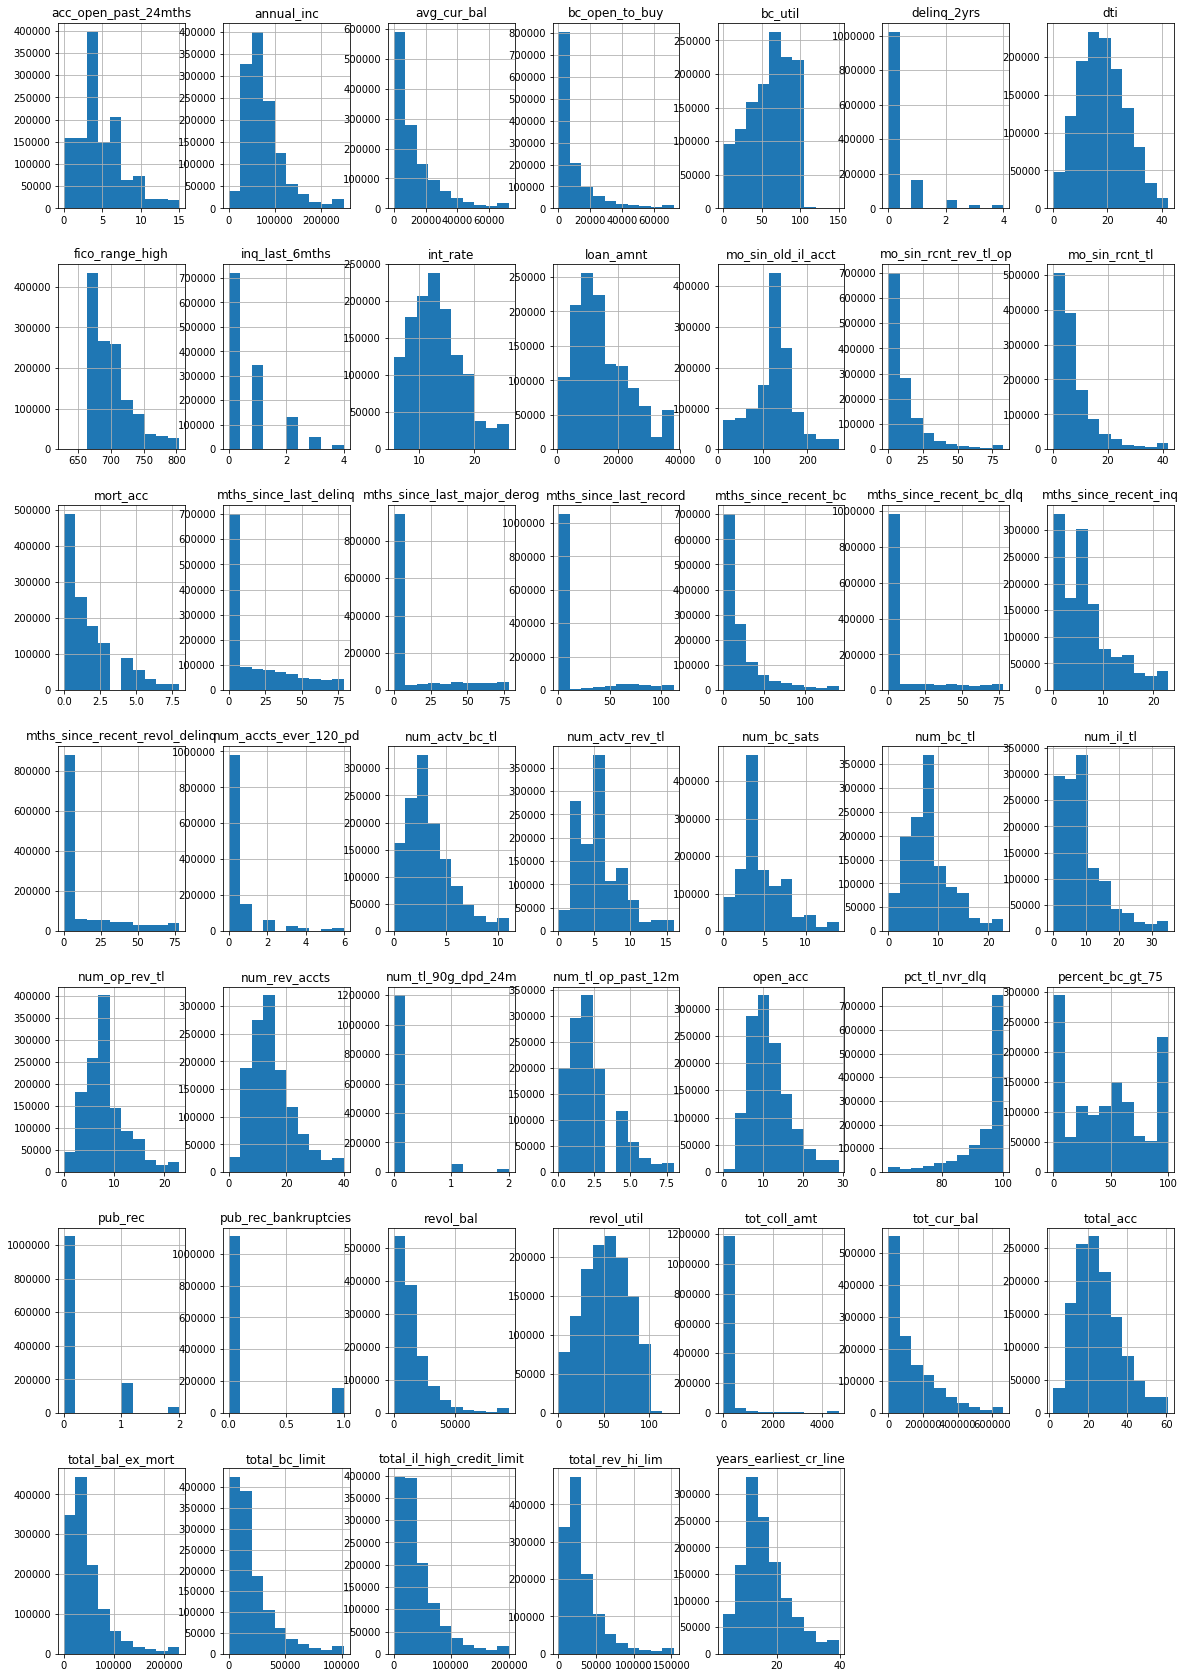

In [14]:
# Plot histogram of all features in nonzero_list
df.loc[:,nonzero_list].hist(figsize=(20,30))
plt.show()

In [24]:
# fico_range_high has two outliers on the left.
df.fico_range_high.sort_values().head()

21        629.0
146       634.0
998230    664.0
998223    664.0
322286    664.0
Name: fico_range_high, dtype: float64

In [25]:
# The two outliers are replaced with 664
df.loc[df.fico_range_high<664,'fico_range_high']=664

#revol_util is the amount of credit the borrower is using relative to all available revolving credit and therefore,
#it cannot be more than 100. Values beyond 100 are capped at 100.
df.loc[df.revol_util>100,'revol_util']=100

#bc_util is ratio of total current balance to high credit limit for all bankcard accounts. and therefore,
#it cannot be more than 100. Values beyond 100 are capped at 100.
df.loc[df.bc_util>100,'bc_util']=100

In [26]:
# Create list of features with skewness more than 1.5
skewed_list = [feature for feature in nonzero_list if np.abs(skew(df.loc[:,feature]))>1.5]

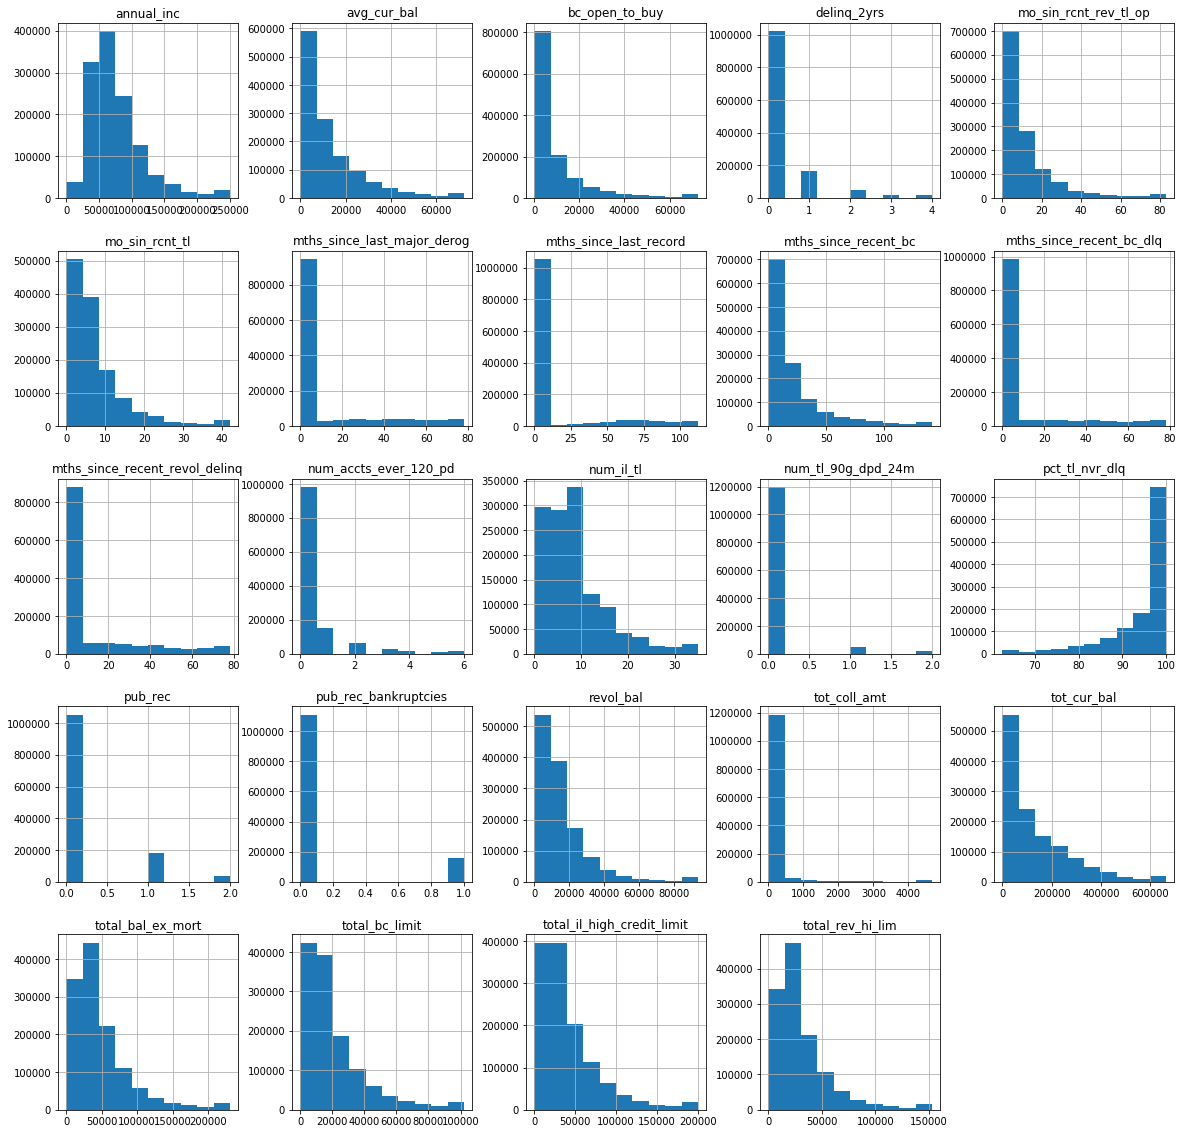

In [27]:
# Plot highly skewed features
df.loc[:,skewed_list].hist(figsize=(20,20))
plt.show()

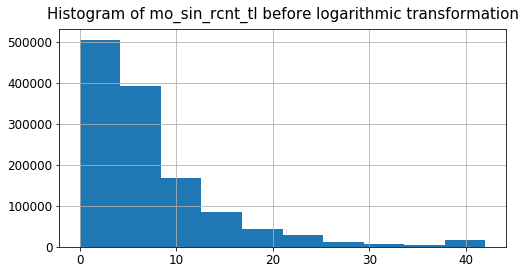

In [23]:
# Plot 'mo_sin_rcnt_tl' in a separate figure
df['mo_sin_rcnt_tl'].hist(figsize=(8,4))
plt.title('Histogram of mo_sin_rcnt_tl before logarithmic transformation',fontsize=15,y=1.02)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

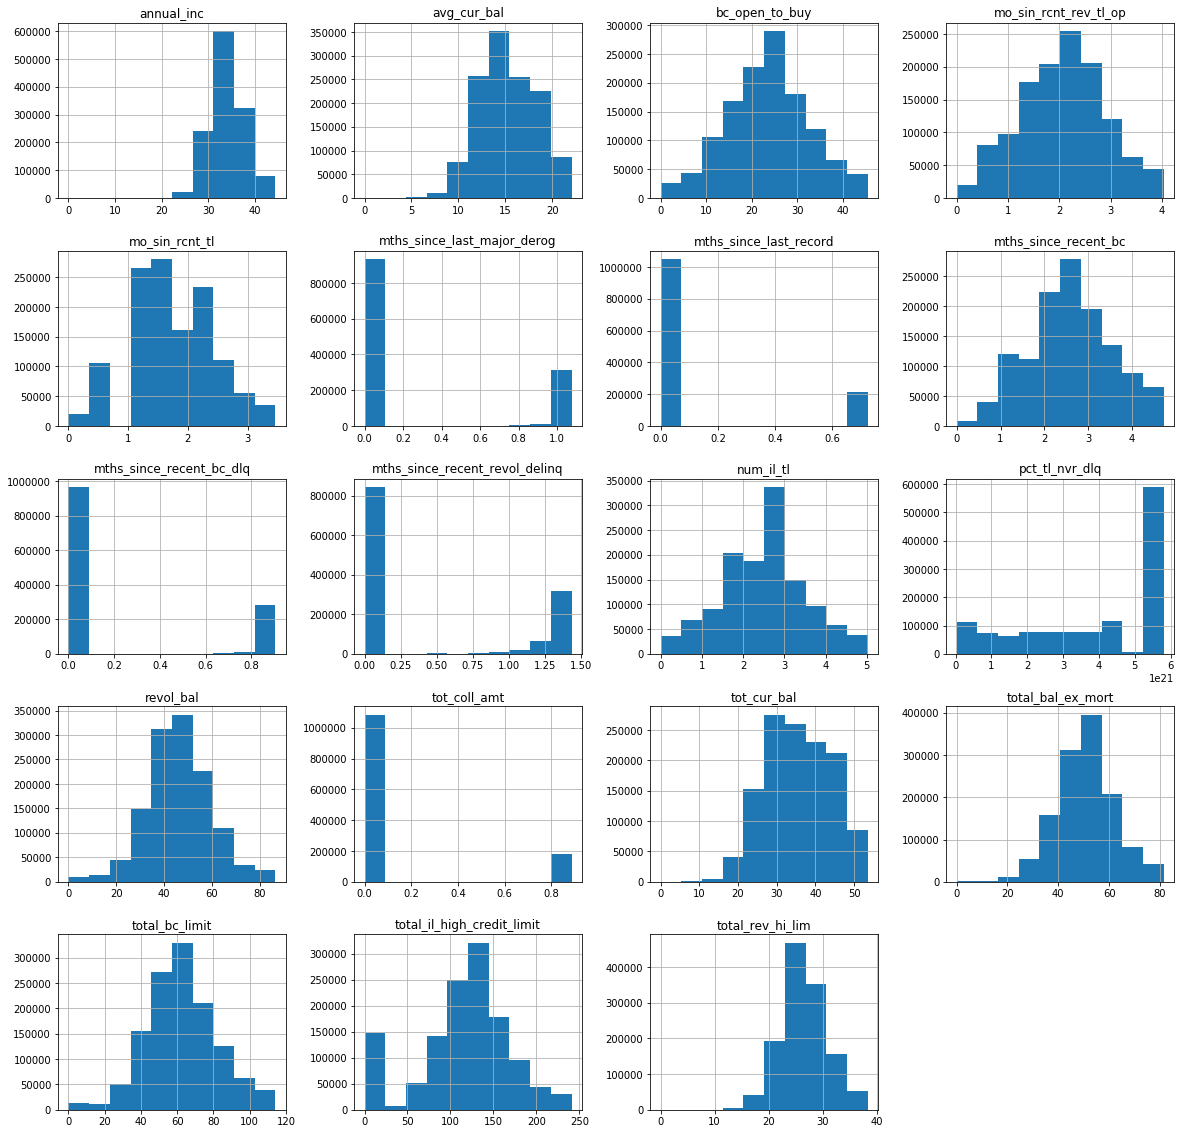

In [28]:
# The following features are excluded because based on their values, they can not be considered as highly skewed
excluded = ['delinq_2yrs','num_accts_ever_120_pd','num_tl_90g_dpd_24m','pub_rec','pub_rec_bankruptcies']
# Excluded these features from the skewed_list
new_skewed = [feature for feature in skewed_list if feature not in excluded]

# Apply coxbox transformation on the highly skewed features
df1=df.loc[:,new_skewed]
for feature in new_skewed:
    l, opt_lambda = boxcox(df1[feature]+1)
    df1[feature]=boxcox(df1[feature]+1,lmbda=opt_lambda)
df1.hist(figsize=(20,20))
plt.show()

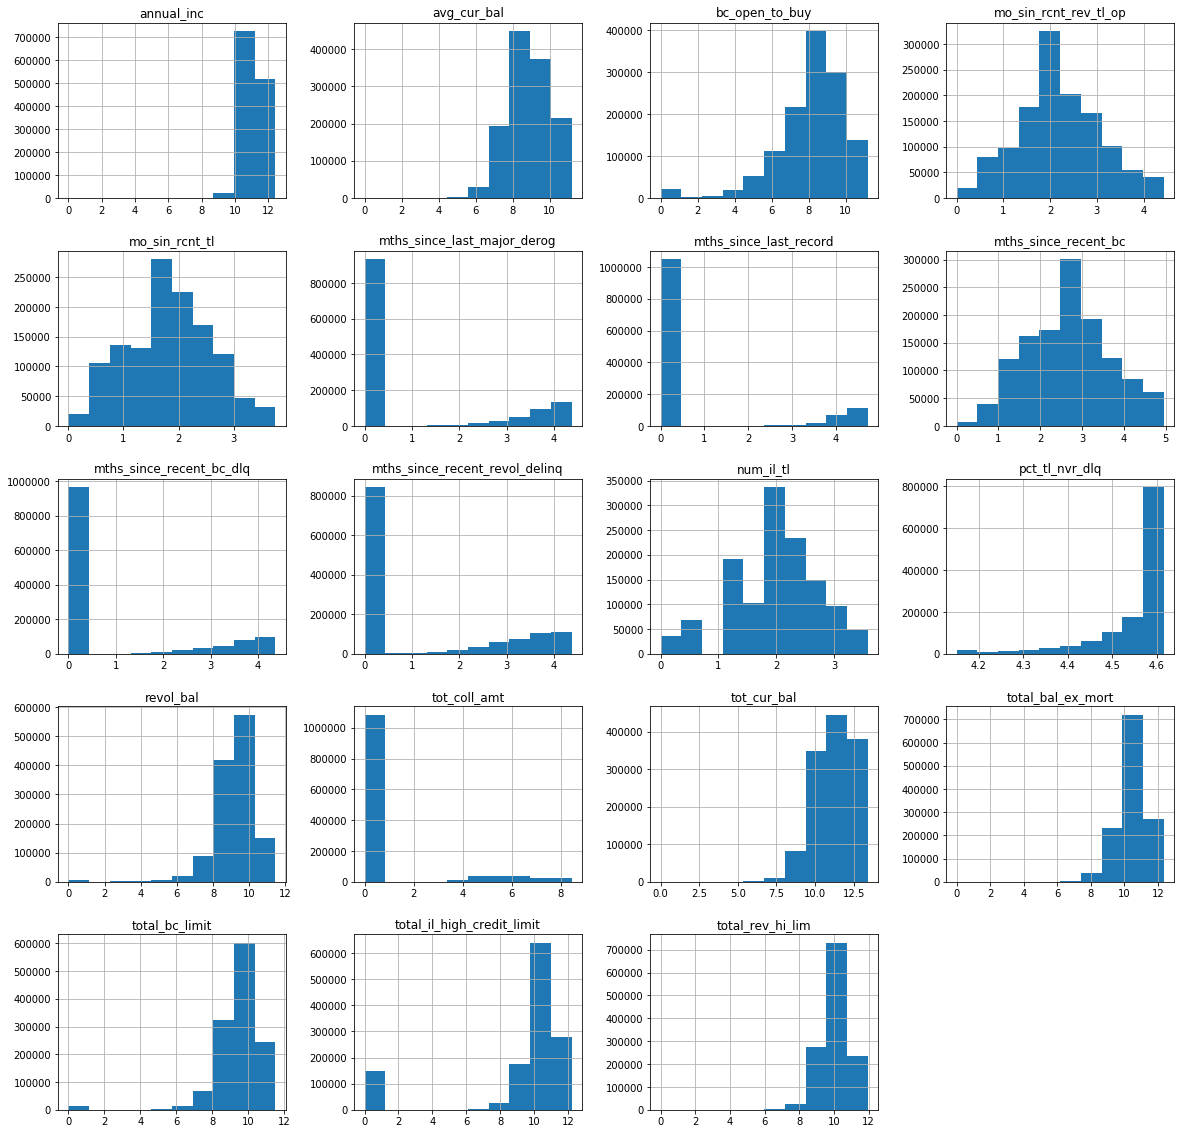

In [29]:
# Apply logarithmic transformation on the highly skewed features
df1=df.loc[:,new_skewed]
df1=df1.apply(lambda x: np.log(x+1))
df1.hist(figsize=(20,20))
plt.show()

In [30]:
# Create list of features for which boxcox transformation reduces more skewness than logarithmic transformation
boxcox_list = ['annual_inc','avg_cur_bal','bc_open_to_buy','mo_sin_rcnt_rev_tl_op','mths_since_recent_bc','num_il_tl',
               'pct_tl_nvr_dlq','revol_bal','tot_cur_bal','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit',
               'total_rev_hi_lim']

# Create list of features for which logarithmic transformation reduces more skewness than coxbox transformation
log_list = ['mo_sin_rcnt_tl','mths_since_last_major_derog','mths_since_last_record','mths_since_recent_bc_dlq',
            'mths_since_recent_revol_delinq','tot_coll_amt']

# Create a copy of df which contains only highly skewed features
df1=df.loc[:,new_skewed]

# Apply coxbox transformationon on features in boxcox_list
for feature in boxcox_list:
    l, opt_lambda = boxcox(df1[feature]+1)
    df1[feature]=boxcox(df1[feature]+1,lmbda=opt_lambda)

# Apply logarithmic transformation on features in log_list
for feature in log_list:
    df1[feature]=np.log(df1[feature]+1)

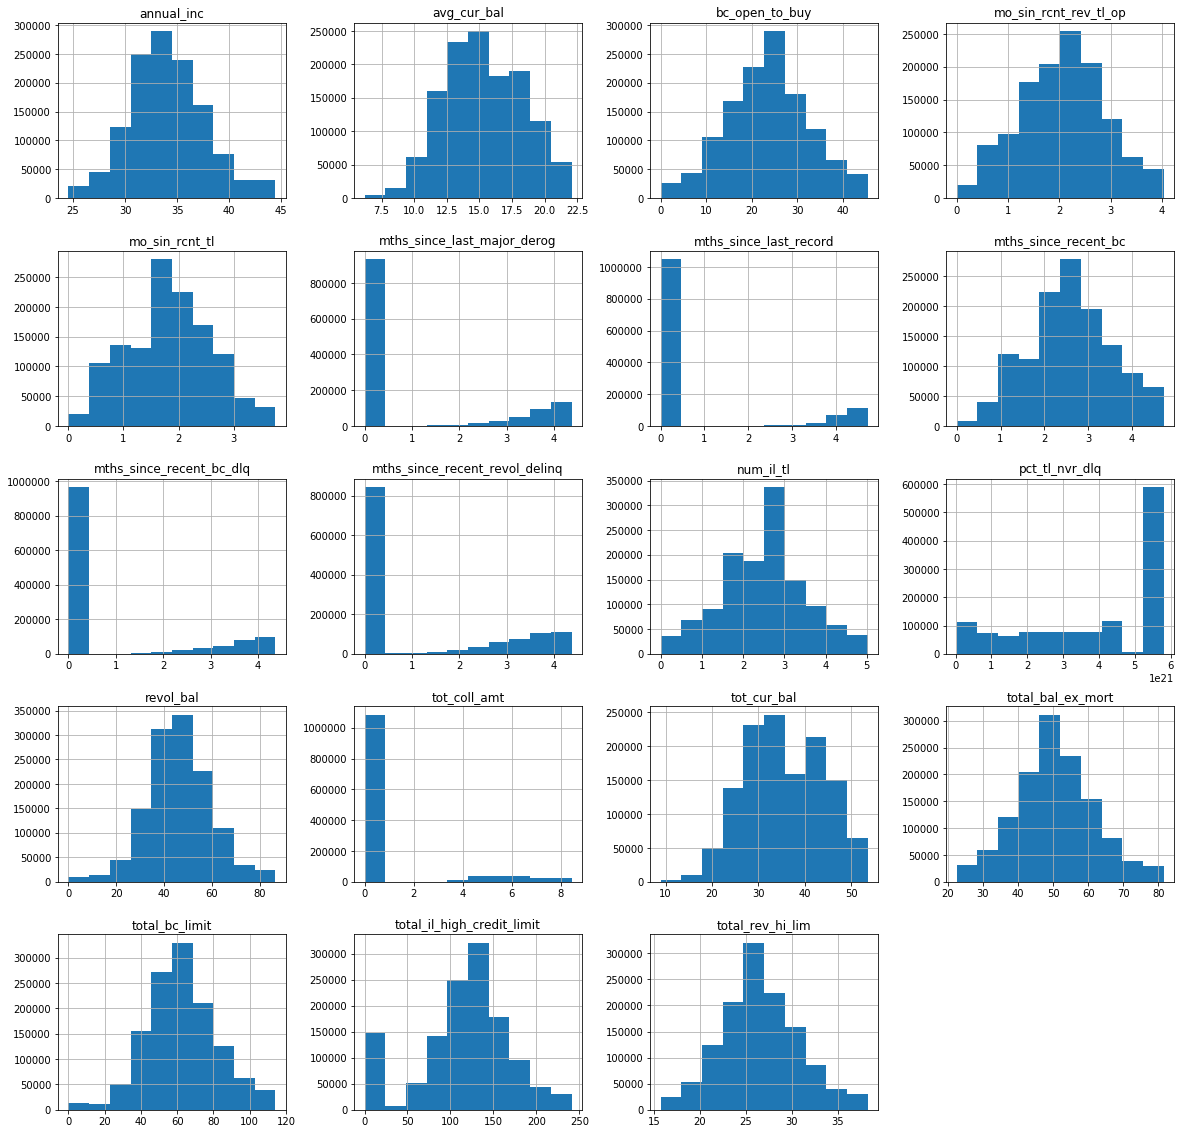

In [31]:
# Apply cap_floor again on some of the skewed features after transformation
df1=cap_floor(df1,['annual_inc','avg_cur_bal','tot_cur_bal','total_bal_ex_mort','total_rev_hi_lim'])
df1.hist(figsize=(20,20))
plt.show()

#### Two dataframes will be created and used in the Machine Learning section, one is the original format of the data, the other one with transformed features without their original format.

In [32]:
# Add transformed features as new features to the dataframe
for feature in df1.columns.tolist():
    df[feature+'_transformed'] = df1[feature]

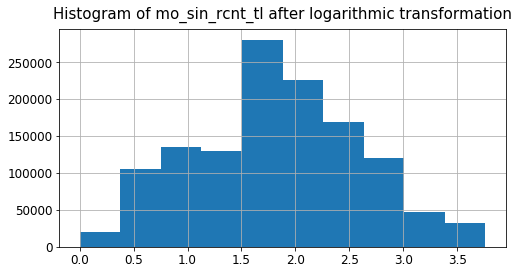

In [33]:
# Plot histogram of mo_sin_rcnt_tl_transformed
df['mo_sin_rcnt_tl_transformed'].hist(figsize=(8,4))
plt.title('Histogram of mo_sin_rcnt_tl after logarithmic transformation',fontsize=15,y=1.02)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [2]:
# Print number of unique job titles
df.emp_title.nunique()

365272

In [24]:
# Replace missing values of employment title with 'misc'
df['emp_title'].fillna('misc',inplace=True)

# Apply strip and title methods to employment titles
df['emp_title'] = df.emp_title.str.lower().str.strip()

#### Many job titles are similar to each other and can be merged.

In [26]:
# The first step is to pick the key word in the job titles. For example, there are 2298 unique job titles that include 
# the word 'clerk'. All of these titles can be replaced with the single-word 'clerk'
len([title for title in df.emp_title.unique().tolist() if 'clerk' in title])

2298

In [27]:
# Create a list of key words in job titles. Note that some key words include a space. For example, the keyword in IT job titles
# is 'it ' because the 'it' word will cover many titles such as 'underwriter' which has no relation with IT jobs 

key_words=['teacher','manager','owner','supervisor','driver','sales','director','engineer','gm ','lvn','rn','lpn','cna',
       'president','officer','technician','accountant','nurse','analyst','server','customer service','electrician',
       'paralegal','operator','consultant','clerk','controller','administrator','maintenance','ceo','superintendent',
      'principal','machin','associate','it ','professor','cashier','laborer','social worker','bartender','bar tender','advisor',
      'physician','welder','receptionist','firefighter','bookkeeper','book keeper','flight attendant','therapist','chef',
    'underwriter','administrative assistant','nursing',' tech','executive assistant','secretary','legal assistant','management',
    'vp','army','cook','lead','sheriff','captain','sergeant','banker','teller','lieutenant','developer','asst','mgm']

In [28]:
# For each key word in the key_words list, replace all the titles in the dataframe which contains that key word with the key word
for key_word in key_words:
    pattern =re.compile('.*{}.*'.format(key_word))
    df.emp_title.replace(to_replace=pattern,value=key_word,inplace=True)

In [29]:
# Merge similar jobs, for example, all 'rn','lpn','cna','nursing', and 'lvn' can be replaced with 'nurse'. Also some job titles
# are updated, for instance, ' tech' is replaced with technician

df.emp_title.replace(['rn','lpn','cna','nursing','lvn'],'nurse',inplace=True) 
df.emp_title.replace(['army','captain','sergeant','lieutenant'],'officer',inplace=True)
df.emp_title.replace({' tech':'technician','executive assistant': 'administrative assistant','secretary': 'receptionist',
                      'legal assistant':'paralegal','bar tender':'bartender','book keeper':'bookkeeper',
                      'management': 'manager','vp': 'president','machin':'machinist','it ':'IT','cook':'chef','teller':'banker',
                      'lead':'leader','gm ':'manager','mgm':'manager','asst':'assistant'},inplace=True)

In [30]:
# At the end, replace titles which contain 'assistant' with 'assistant'. This is done in the last step because 'assistant'
# is a general term, and if any of the key words in the key_words list exists in the job title, it has a higher priority than
# the 'assistant' word
df.emp_title.replace(to_replace=re.compile('.*assistant.*'),value='assistant',inplace=True)

In [31]:
# Print number of unique job titles after all the cleaning steps
df.emp_title.nunique()

169887

In [32]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,stratify=df.charged_off,test_size=0.25,random_state=21)

In [33]:
# Print number of unique job titles in the train set
df_train.emp_title.nunique()

134818

In [34]:
# Create a new column for employment title. All the changes on employment title from this point will be implemented on this new
# column
df_train['emp_title_new'] = df_train.emp_title

In [35]:
# For the titles with frequency of less than 10, replace the title with 'misc'
title_list = [title for title,frequency in df_train.emp_title.value_counts().items() if frequency<10]
df_train.emp_title_new.replace(to_replace=title_list,value='misc',inplace=True)

In [36]:
# Print number of unique job titles in the train set after replacing titles with frequency of less than 10 with 'misc'
df_train.emp_title_new.nunique()

3200

In [37]:
# Save the train and test dataframes to csv files
df_train.to_csv('df_train_temp.csv',index=False)
df_test.to_csv('df_test_temp.csv',index=False)

In [2]:
# Read the train and test dataframes
#df_train = pd.read_csv('df_train_temp.csv',low_memory=False)
#df_test = pd.read_csv('df_test_temp.csv',low_memory=False)

In [3]:
# Create a new column for zip code in which every zip code which has five or less occurrences is replaced with '00xxx'
# All zip codes contain only the first three digits

# Find zip codes with five or less occurrences
a = df_train.zip_code.value_counts()
zip_codes = a[a<=5].index.tolist()

# Define the new zip code column
df_train['zip_code_new'] = df_train.zip_code
df_train.zip_code_new.replace(to_replace = zip_codes, value='000xx',inplace=True)

In [4]:
# Define a function which transforms the two features to numerical features in the train set
def cat_to_num(df=df_train,feature_list=['zip_code','emp_title']):
    """This function is introduced to transform emp_title and zip_code to numerical features. The function creates a new 
    numerical feature corresponding to each of the two features. The value of the new feature corresponding to each unique
    value of emp_title/zip_code is the charged-off ratio across all samples with that unique value"""
    
    df_copy = df.copy()
    for feature in feature_list:
        df_group = df.groupby(feature+'_new')['charged_off'].mean()
        df_copy[feature+'_numeric'] = df_copy[feature+'_new'].map(df_group)
        df_copy = cap_floor(df_copy,[feature+'_numeric'])
    return df_copy

In [7]:
# Create the numerical features in df_train
df_train = cat_to_num()

In [8]:
# Createw a function which creates numerical features corresponding the two features in the test set.
def testset_trans(df_test=df_test,df_train=df_train,values={'zip_code':'000xx','emp_title':'misc'}):
    """This function creates the numerical features corresponding to the features with high cardinality problem in the test set
    based on the values in the train set. The function also keeps only the numerical format of the two features in both train
    and test sets and removes the other formats"""
    df_test_copy = df_test.copy()
    df_train_copy = df_train.copy()
    for feature,value in values.items():
        df_test_copy[feature+'_new'] = df_test_copy[feature]
        missing = list(set(df_test_copy[feature+'_new'].values) - set(df_train[feature+'_new'].values))
        if len(missing)>0:
            df_test_copy[feature+'_new'].replace(to_replace=missing,value=value,inplace=True)
        group = df_train.groupby(feature+'_new')[feature+'_numeric'].first()
        df_test_copy[feature+'_numeric'] = df_test_copy[feature+'_new'].map(group)
        df_test_copy.drop([feature,feature+'_new'],axis=1,inplace=True)
        df_train_copy.drop([feature,feature+'_new'],axis=1,inplace=True)
    return df_test_copy,df_train_copy

In [9]:
# Create the numerical features in the test set and remove the original features from both train and test sets
df_test,df_train = testset_trans()

In [10]:
# Save the train and test dataframes to csv files
df_train.to_csv('df_train.csv',index=False)
df_test.to_csv('df_test.csv',index=False)